# Polynominal Linear Regression

In [69]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df= pd.read_csv("dataset2.csv", sep=";")
df

,car_price,speed_max
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


Price değişkenini x değerine ve speed_max'ı ise y eksenine eşitleyeceğiz. Sklearn kullanarak polynominal linear regression implemet edeceğimiz için bunları birer array'e çevirip ardından 1. indexini 1 diye belirteceğiz reshape methodu kullanarak.

In [71]:
x= df.car_price.values.reshape(-1,1)
y= df.speed_max.values.reshape(-1,1)

Text(0, 0.5, 'Car Max Speed')

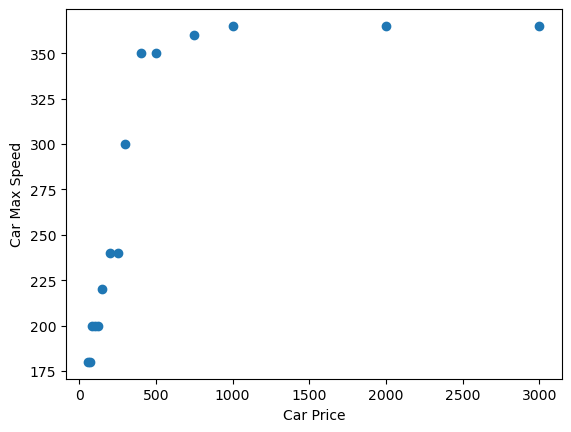

In [72]:
plt.scatter(df.car_price,df.speed_max)
plt.xlabel("Car Price")
plt.ylabel("Car Max Speed")



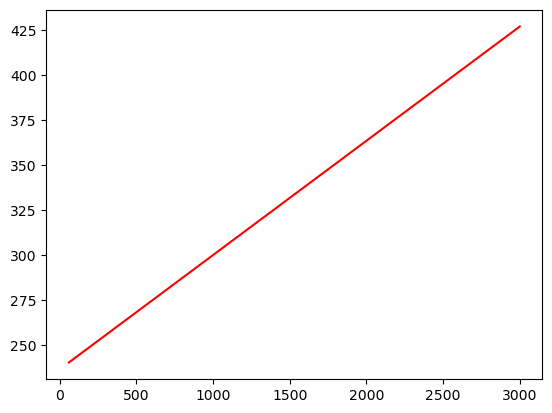

In [73]:
#Linear regression

from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression()
linear_reg.fit(x,y)
y_head= linear_reg.predict(x)
plt.plot(x,y_head,color="r")
plt.show()

Linear Regression ===> b0+b1*x

Multilinear Regression ===> b0+ b1*x1+ b2*b2

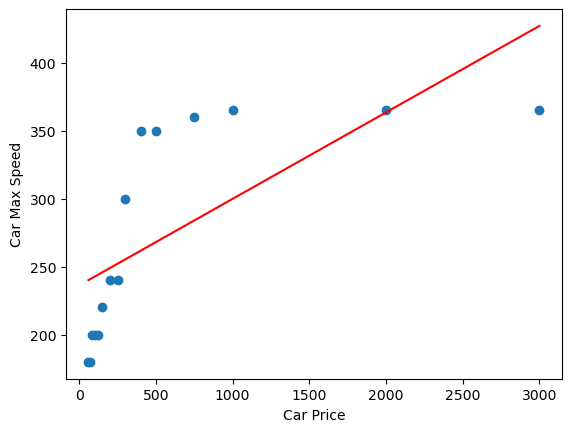

In [74]:

linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_head = linear_reg.predict(x)

# Scatter plot ve lineer regresyon çizimi
plt.scatter(x, y)
plt.plot(x, y_head, color="red")
plt.xlabel("Car Price")
plt.ylabel("Car Max Speed")
plt.show()

Problem polynominal olduğunudan ve bir eğim olması gerektiğinden görüldüğü üzere modelimiz başarısız oldu. Yani linear olması probleme yetmedi.

In [75]:
linear_reg.predict([[10000]]) #Neredeyse bir uçak hızı 

array([[871.66401826]])

Polynominal Regression = y= b0 + b1*x + b2*x^2 + b3+x^3

# Polynomial Linear Regression with Python

Polynominal Regression = y= b0 + b1*x + b2*x^2 + b3+x^3+...........bn*x^n


Şimdi problemimizi polynomial ile implemet edeceğiz. b0 y ekseninin kesilmesi, b1 price'ın katsayısı olacak peki x^2 eldesi nasıl olacak? İşte bu problemin çözüm aşamaları:

In [76]:
from sklearn.preprocessing import PolynomialFeatures

Problemimizin derecesini iki belirleyeceğiz. 

In [77]:
polynominal_regression= PolynomialFeatures(degree=2)


In [78]:
x_polynomial= polynominal_regression.fit_transform(x)

fit_transform değeri her bir değerin karşılığını karşısına yazması için kullandığımız bir yöntemdir.

x_polynomial'ı dataframe yapısına çevirip bakarsak 0. sütunda bias değerimiz, 1. sütunda x değerlerimiz 2. sütunda ise x^2 değerimizi vardır.

Eğer degree değerini değiştirisek neler olabilir?

Bias değeriyle beraber toplam 5 sütunlu bir x_polnomial değerini elde ederiz.


DataFrame'i incelersek 60 değeri ve karşısında karesi 3600 değeri bulunuyor.

In [79]:
pd.DataFrame(x_polynomial)

,0,1,2
0,1.0,60.0,3600.0
1,1.0,70.0,4900.0
2,1.0,80.0,6400.0
3,1.0,100.0,10000.0
4,1.0,120.0,14400.0
5,1.0,150.0,22500.0
6,1.0,200.0,40000.0
7,1.0,250.0,62500.0
8,1.0,300.0,90000.0
9,1.0,400.0,160000.0


In [80]:
pl_regression= LinearRegression()
pl_regression.fit(x_polynomial,y)

LinearRegression()

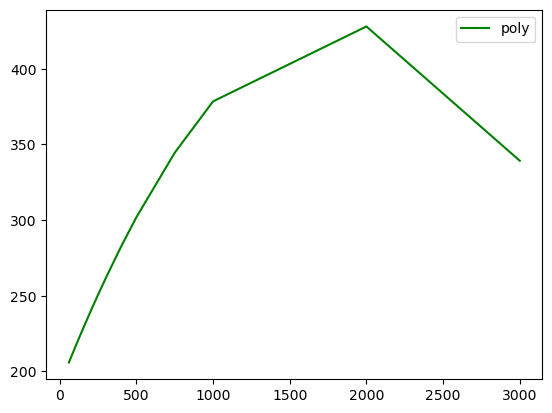

In [81]:
y_head= pl_regression.predict(x_polynomial)
plt.plot(x, y_head, color= "g", label= "poly")
plt.legend()
plt.show()

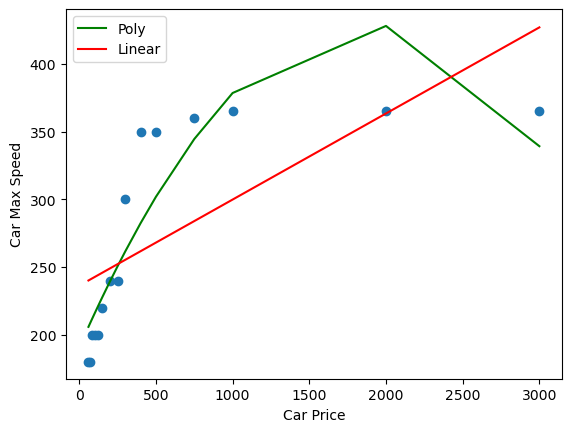

In [86]:
pl_regression= LinearRegression()
pl_regression.fit(x_polynomial,y)
y_head= pl_regression.predict(x_polynomial)

linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_head2 = linear_reg.predict(x)

# Scatter plot ve lineer regresyon çizimi
plt.scatter(x, y)
plt.plot(x, y_head ,color="g", label="Poly")
plt.plot(x,y_head2, color="r", label="Linear")
plt.legend()
plt.xlabel("Car Price")
plt.ylabel("Car Max Speed")
plt.show()

Eğer degree derecesini arttırırsak modelimiz çok daha iyi fit edecektir. Fakat şunu unutmayalım eğer ki problemin karmaşıklığını geçerse modelimiz sorunu ezberler ve predict yapmak istediğimizde predict değerleri iyi olmayacaktır çünkü model ezber yapmış olacaktır. 